# **EDA ON PAKISTAN LARGEST E-COMMERCE DATASET**
Author: Muhammad Yousif

Contact : hellomyousif@gmail.com

Data Source : Kaggel

## **Dataset Information**
Content
Geography: Pakistan

Time period: 03/2016 – 08/2018

Unit of analysis: E-Commerce Orders

Dataset: The dataset contains detailed information of half a million e-commerce orders in Pakistan from March 2016 to August 2018. It contains item details, shipping method, payment method like credit card, Easy-Paisa, Jazz-Cash, cash-on-delivery, product categories like fashion, mobile, electronics, appliance etc., date of order, SKU, price, quantity, total and customer ID. This is the most detailed dataset about e-commerce in Pakistan that you can find in the Public domain.

Variables: The dataset contains Item ID, Order Status (Completed, Cancelled, Refund), Date of Order, SKU, Price, Quantity, Grand Total, Category, Payment Method and Customer ID.

In [173]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# loading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pakistan Largest Ecommerce Dataset.csv')
df.head()

<ipython-input-174-a989eba27a30>:2: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.



,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


### **Data Wrangling**

In [175]:
print('Shape of datasets Rows/Columns : ',df.shape)

Shape of datasets Rows/Columns :  (1048575, 26)


In [176]:
print('dataset Information :', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [177]:
print('Null values/Cells in datasets in Percentages :\n',df.isnull().sum()*100/len(df))

Null values/Cells in datasets in Percentages :
 item_id                   44.255394
status                    44.256825
created_at                44.255394
sku                       44.257302
price                     44.255394
qty_ordered               44.255394
grand_total               44.255394
increment_id              44.255394
category_name_1           44.271034
sales_commission_code     57.337434
discount_amount           44.255394
payment_method            44.255394
Working Date              44.255394
BI Status                 44.255394
 MV                       44.255394
Year                      44.255394
Month                     44.255394
Customer Since            44.256443
M-Y                       44.255394
FY                        44.255394
Customer ID               44.256443
Unnamed: 21              100.000000
Unnamed: 22              100.000000
Unnamed: 23              100.000000
Unnamed: 24              100.000000
Unnamed: 25              100.000000
dtype: float64


In [178]:
# print columns name
print('Columns Name :\n ', df.columns)

Columns Name :
  Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [179]:
# Remove unneceesorry columns
df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],inplace=True)

In [180]:
print("Descriptive Statistics about data \n")
df.describe()

Descriptive Statistics about data 



,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


In [181]:
# Remove null values from datasets which makes no sence
df.dropna(inplace=True)

In [182]:
# checking null values again
df.isnull().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

In [183]:
print('data types of each columns :\n',df.dtypes)

data types of each columns :
 item_id                  float64
status                    object
created_at                object
sku                       object
price                    float64
qty_ordered              float64
grand_total              float64
increment_id              object
category_name_1           object
sales_commission_code     object
discount_amount          float64
payment_method            object
Working Date              object
BI Status                 object
 MV                       object
Year                     float64
Month                    float64
Customer Since            object
M-Y                       object
FY                        object
Customer ID              float64
dtype: object


In [184]:
df = df

### **EDA and Visualization**

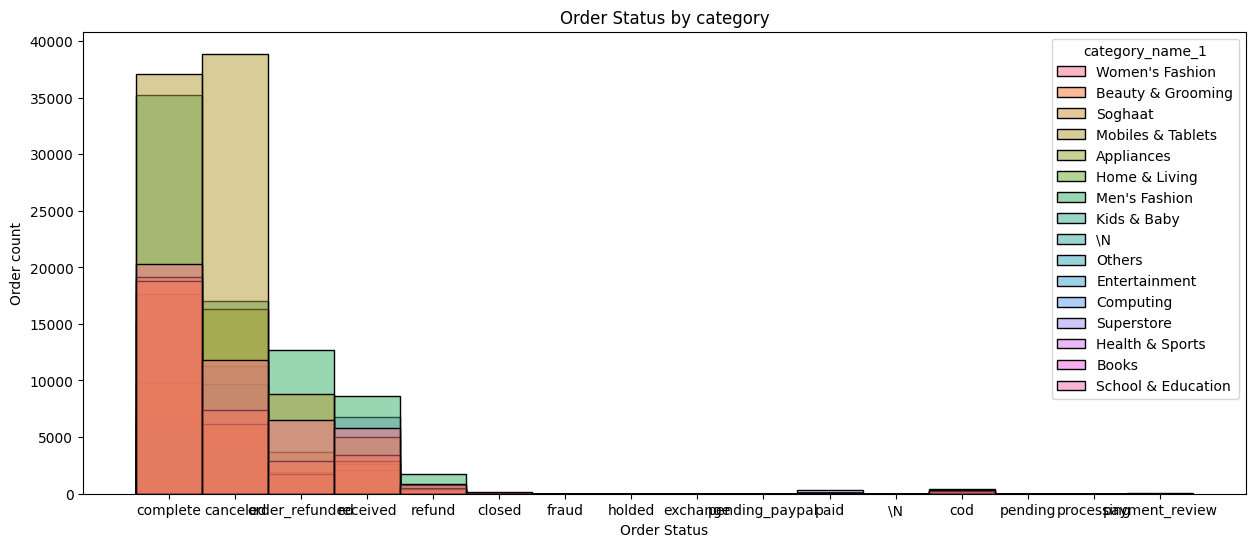

In [185]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='status',hue='category_name_1')
plt.ylabel('Order count')
plt.xlabel('Order Status')
plt.title('Order Status by category')
plt.show()

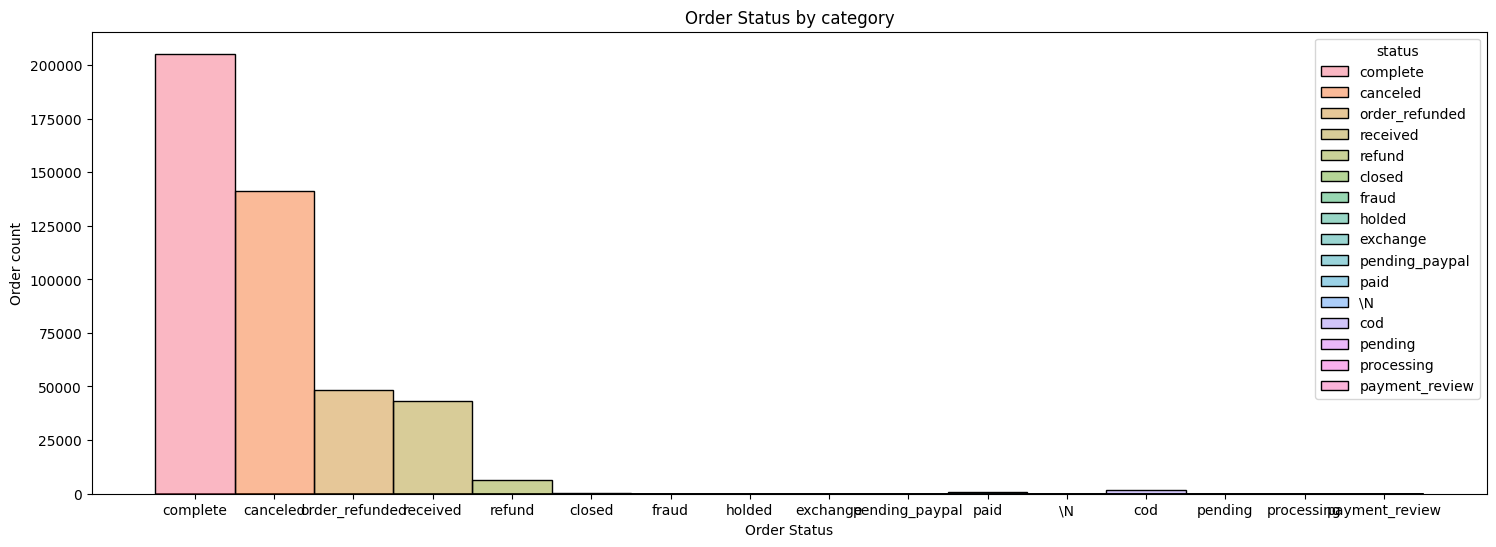

In [186]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='status',hue='status')
plt.ylabel('Order count')
plt.xlabel('Order Status')
plt.title('Order Status by category')
plt.show()

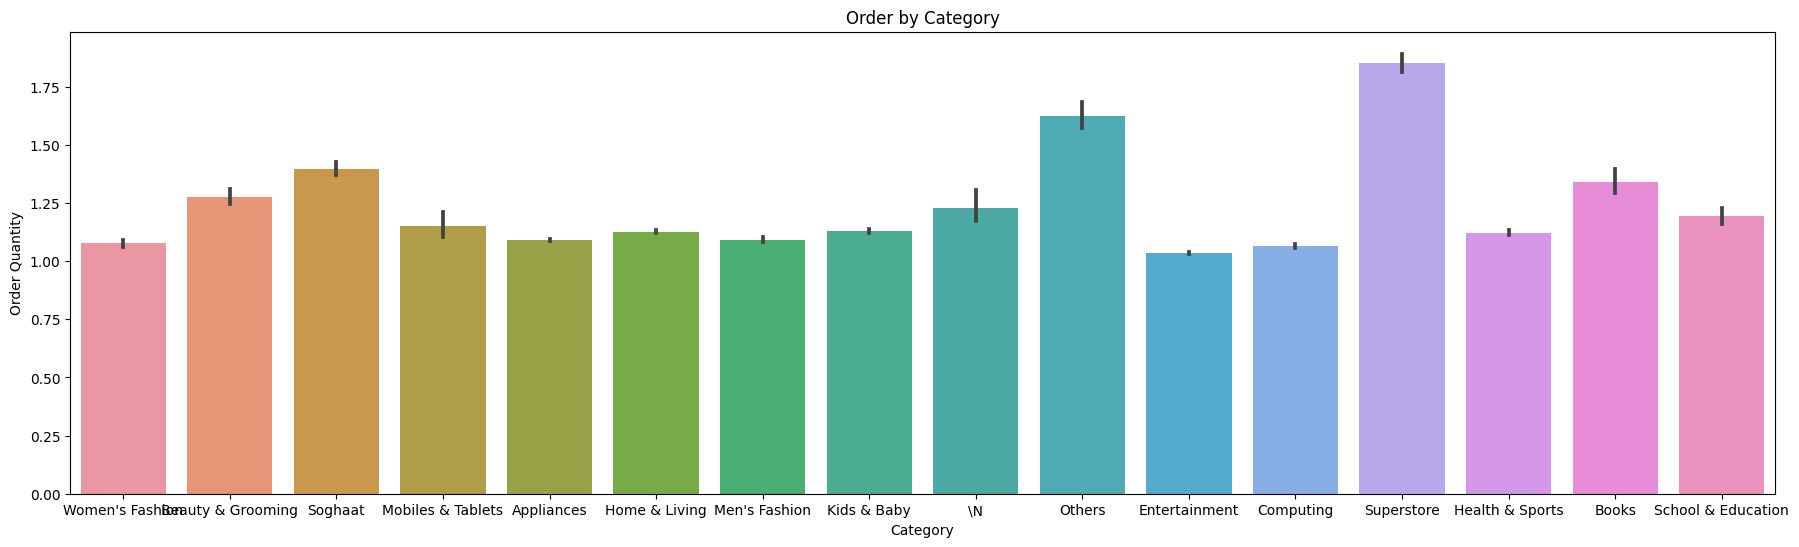

In [187]:
plt.figure(figsize=(22,6))
sns.barplot(data=df,x='category_name_1',y='qty_ordered')
plt.ylabel('Order Quantity')
plt.xlabel('Category')
plt.title('Order by Category')
plt.show()

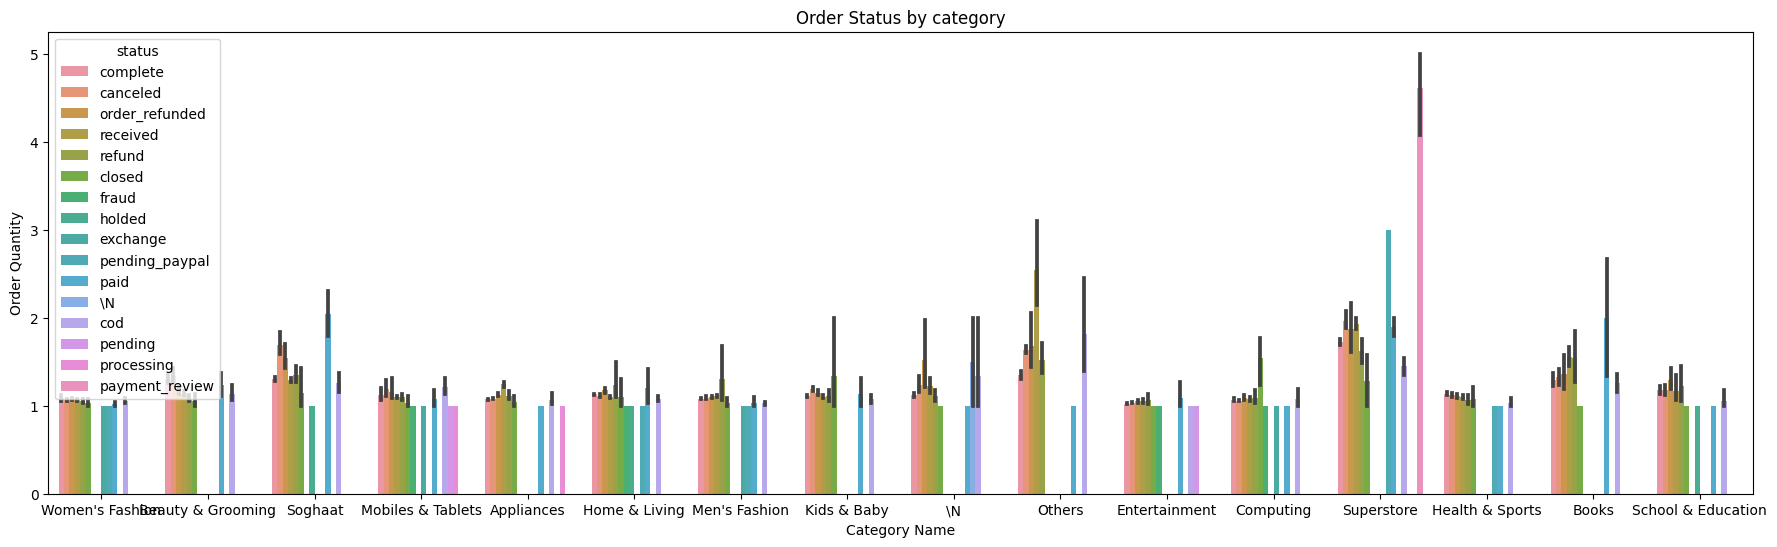

In [198]:
plt.figure(figsize=(22,6))
sns.barplot(data=df,x='category_name_1',y='qty_ordered',hue='status')
plt.ylabel('Order Quantity')
plt.xlabel('Category Name')
plt.title('Order Status by category')
plt.show()

Text(0.5, 1.0, 'Discount based on Categroy')

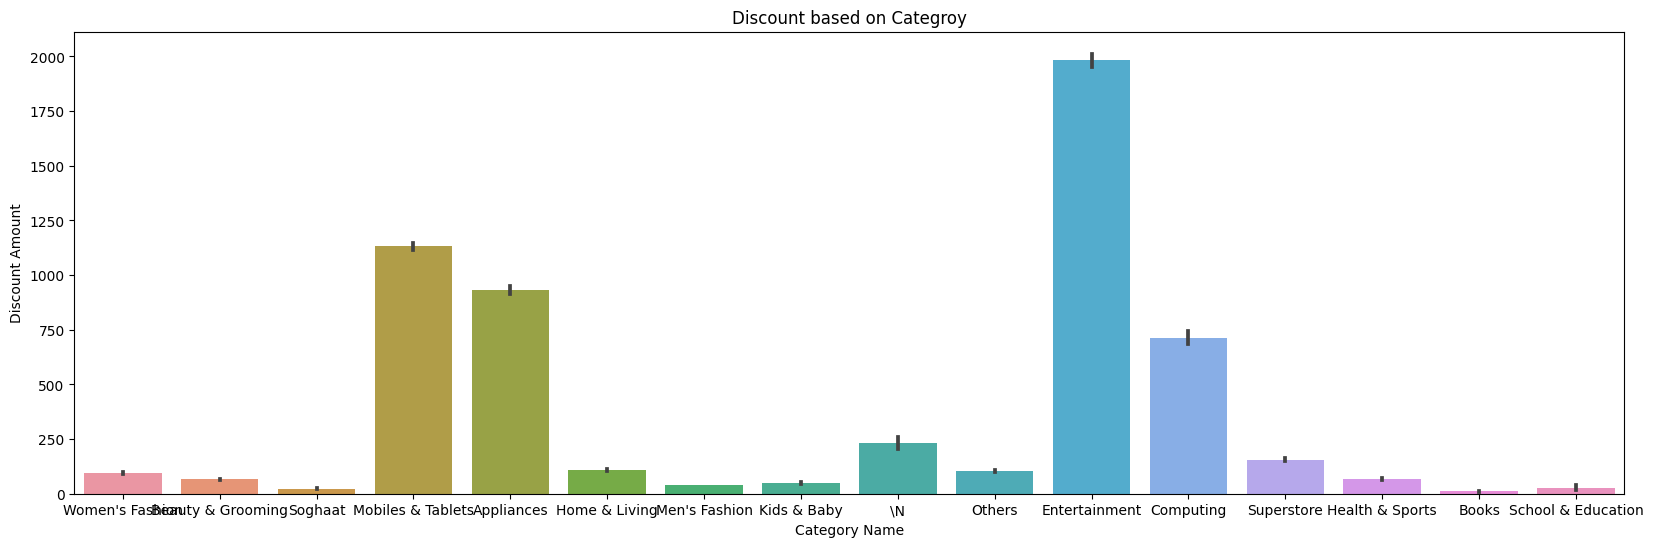

In [199]:
plt.figure(figsize=(20,6))
sns.barplot(data=df,y='discount_amount',x='category_name_1')
plt.xlabel('Category Name')
plt.ylabel('Discount Amount')
plt.title('Discount based on Categroy')

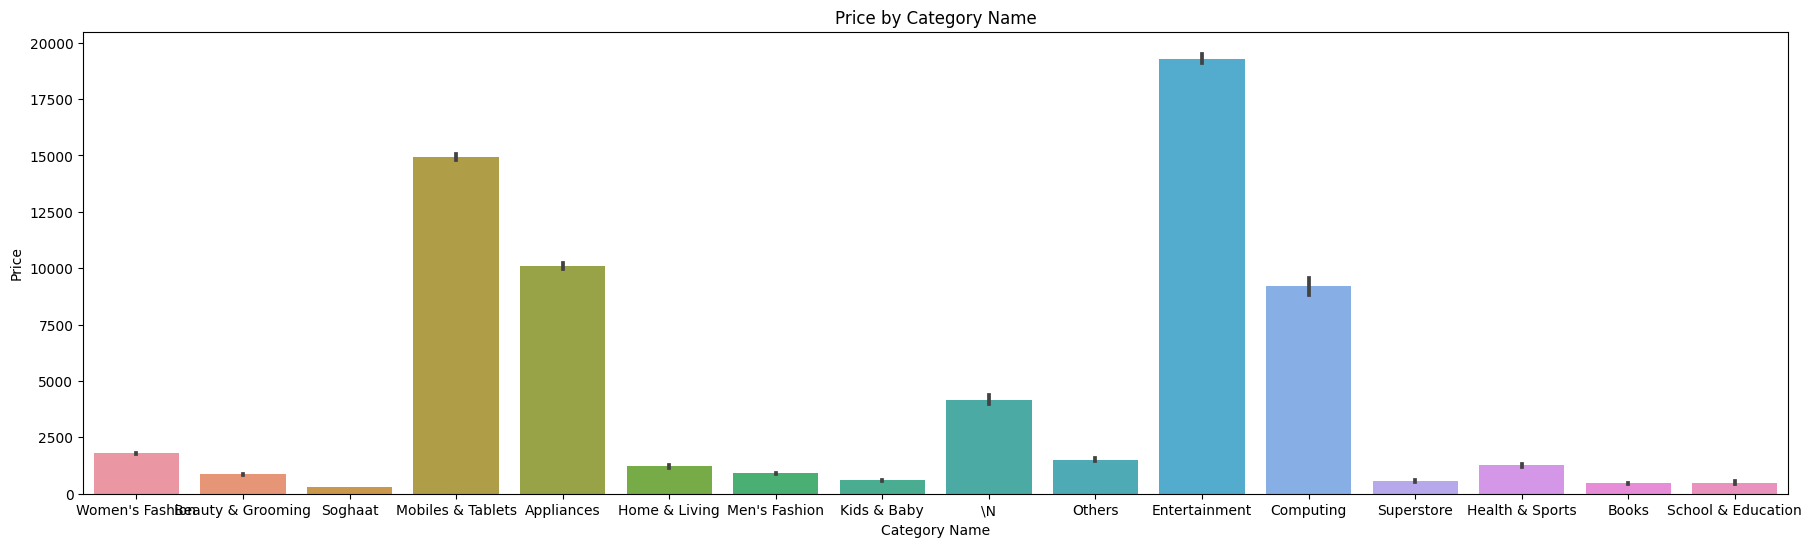

In [200]:
plt.figure(figsize=(22,6))
sns.barplot(data=df,y='price',x='category_name_1')
plt.ylabel('Price')
plt.xlabel('Category Name')
plt.title('Price by Category Name')
plt.show()

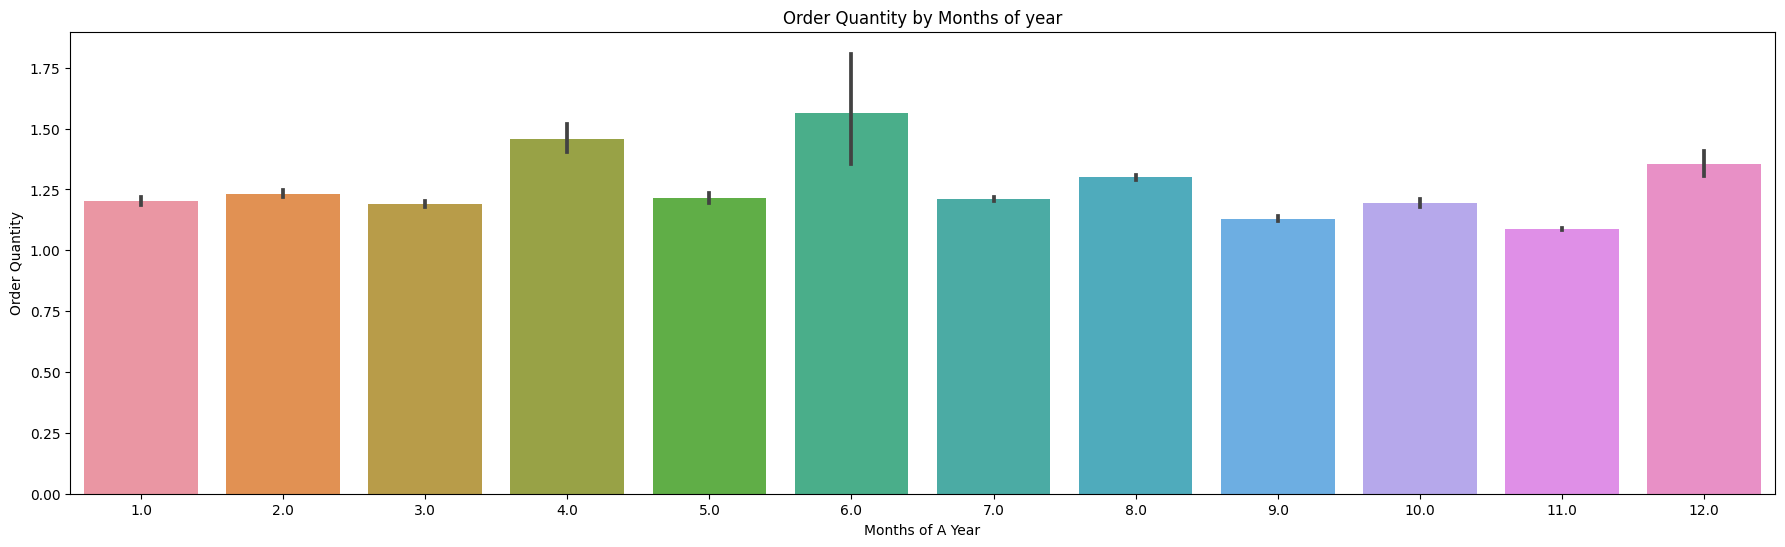

In [201]:
plt.figure(figsize=(22,6))
sns.barplot(data=df,y='qty_ordered',x='Month')
plt.ylabel('Order Quantity')
plt.xlabel('Months of A Year')
plt.title('Order Quantity by Months of year')
plt.show()

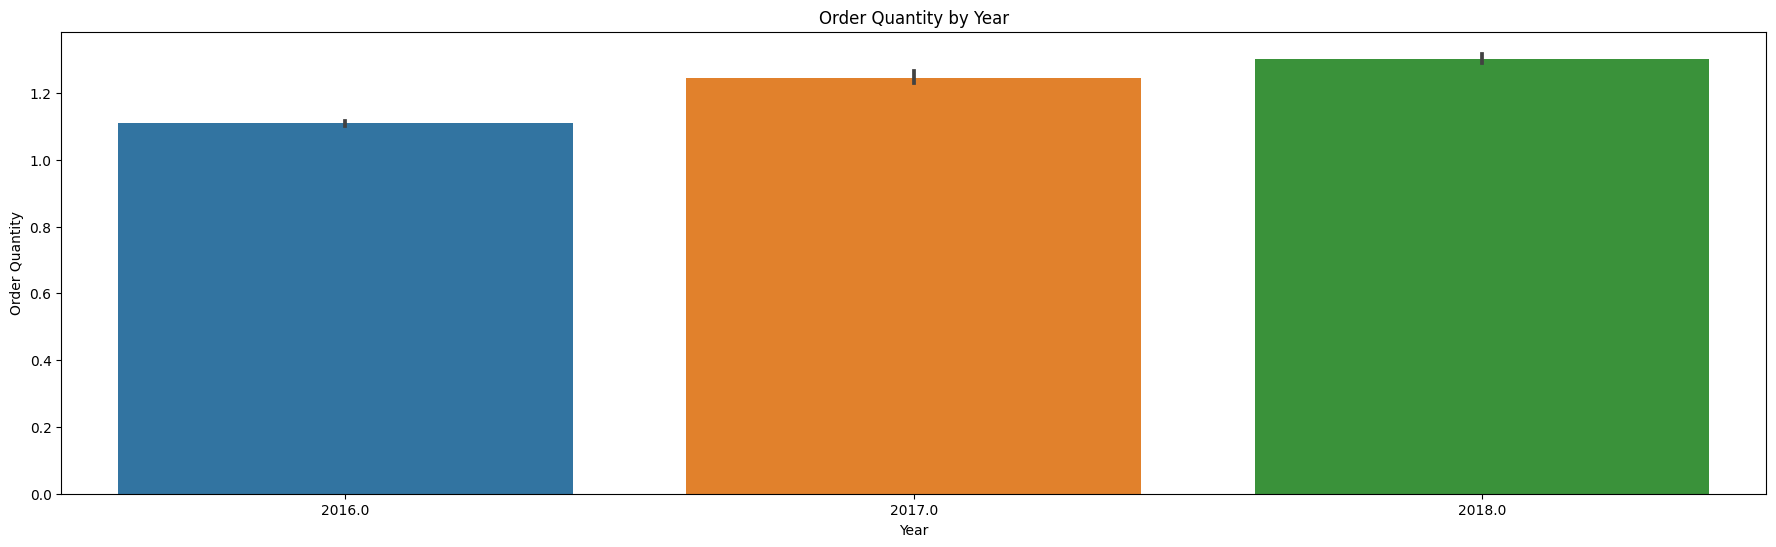

In [202]:
plt.figure(figsize=(22,6))
sns.barplot(data=df,y='qty_ordered',x='Year')
plt.ylabel('Order Quantity')
plt.xlabel('Year')
plt.title('Order Quantity by Year')
plt.show()

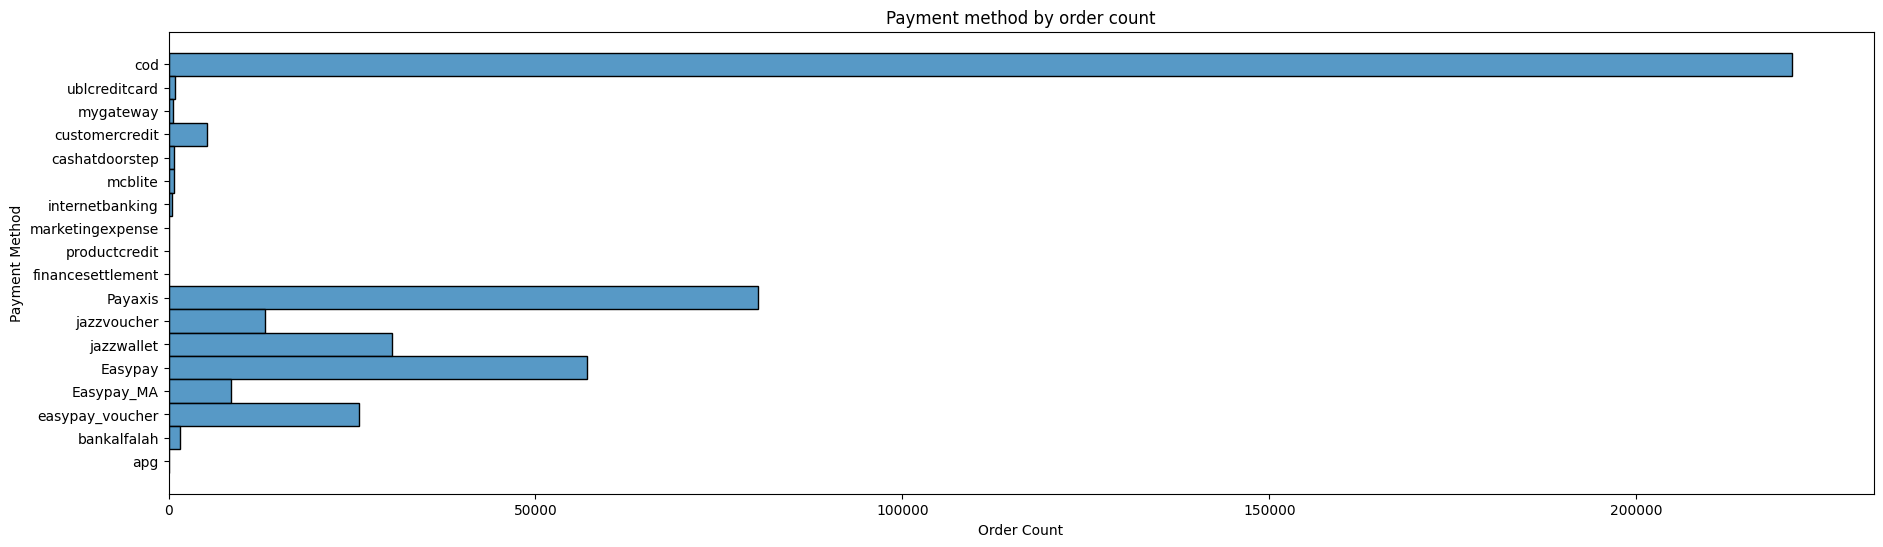

In [203]:
plt.figure(figsize=(22,6))
sns.histplot(data=df,y='payment_method')
plt.ylabel('Payment Method')
plt.xlabel('Order Count')
plt.title('Payment method by order count')
plt.show()

Text(0.5, 1.0, 'Order made By customer since')

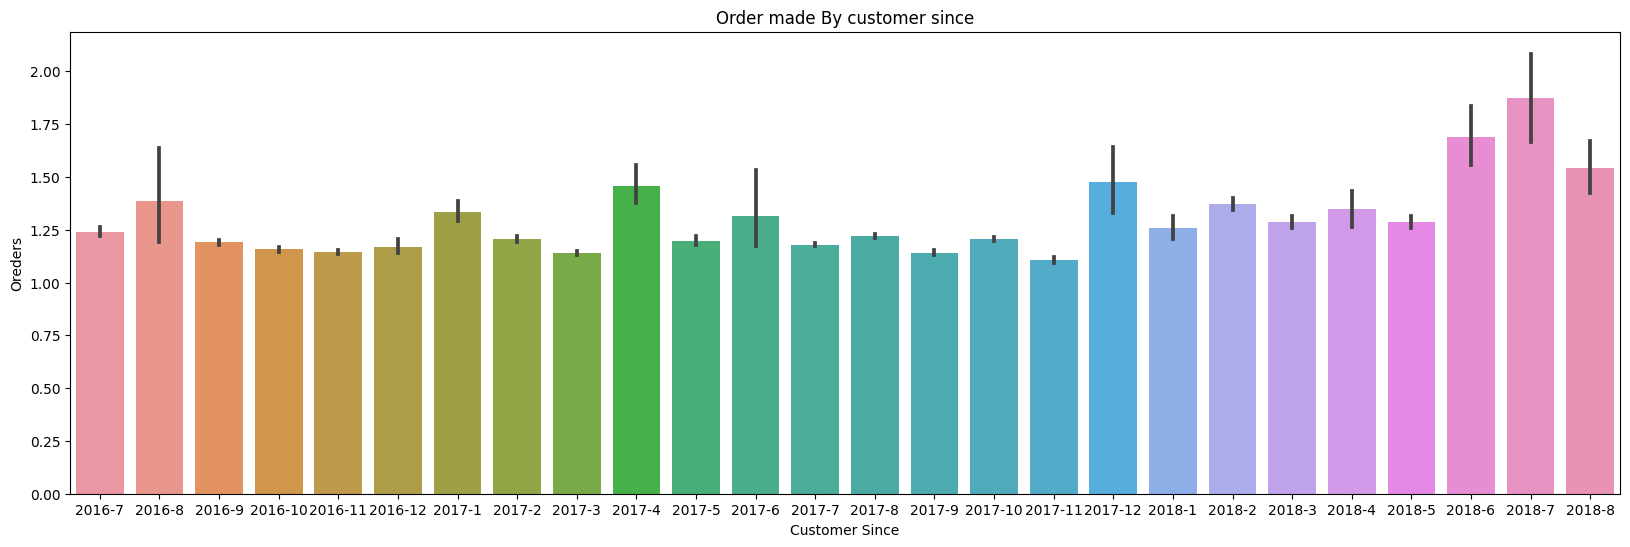

In [204]:
plt.figure(figsize=(20,6))
sns.barplot(data=df,x='Customer Since',y='qty_ordered')
plt.xlabel('Customer Since')
plt.ylabel('Oreders')
plt.title('Order made By customer since')

Text(0.5, 1.0, 'Product purcahsed by customer since by category')

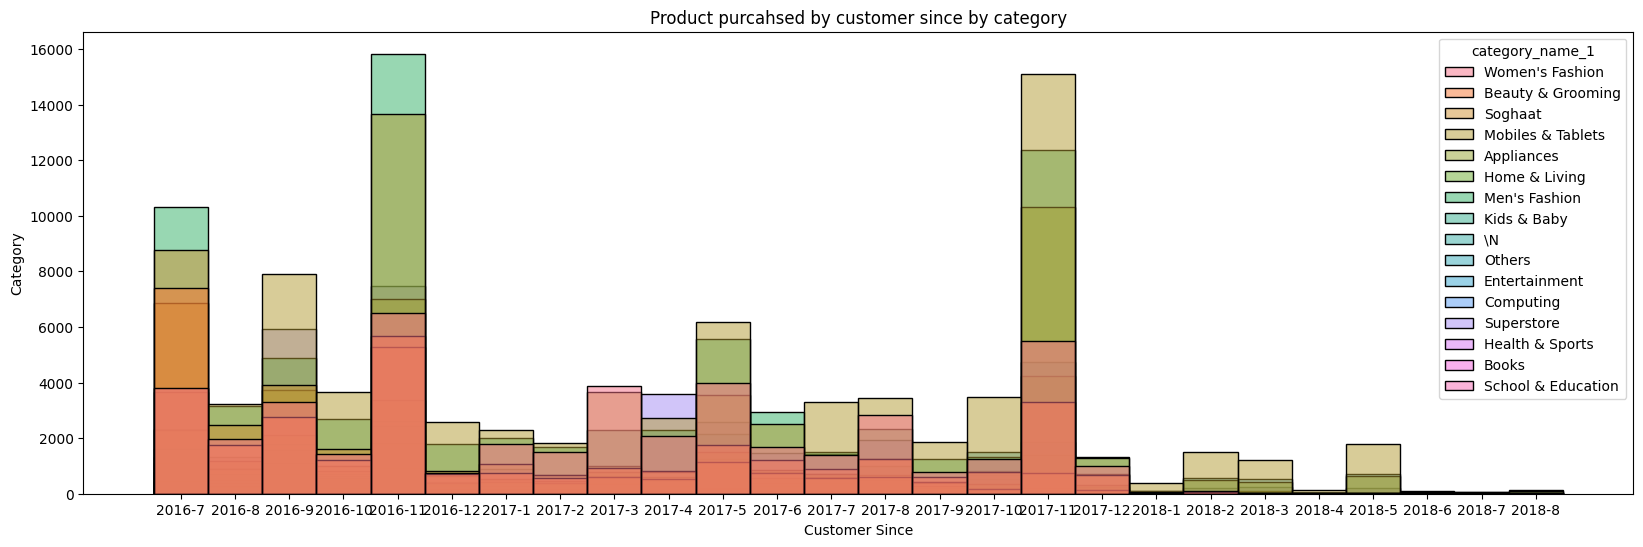

In [205]:
plt.figure(figsize=(20,6))
sns.histplot(data=df,x='Customer Since',hue='category_name_1')
plt.xlabel('Customer Since')
plt.ylabel('Category')
plt.title('Product purcahsed by customer since by category')

<ipython-input-207-674ac25c2f9b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correletion Plot showing Positive/Negitive reletionship')

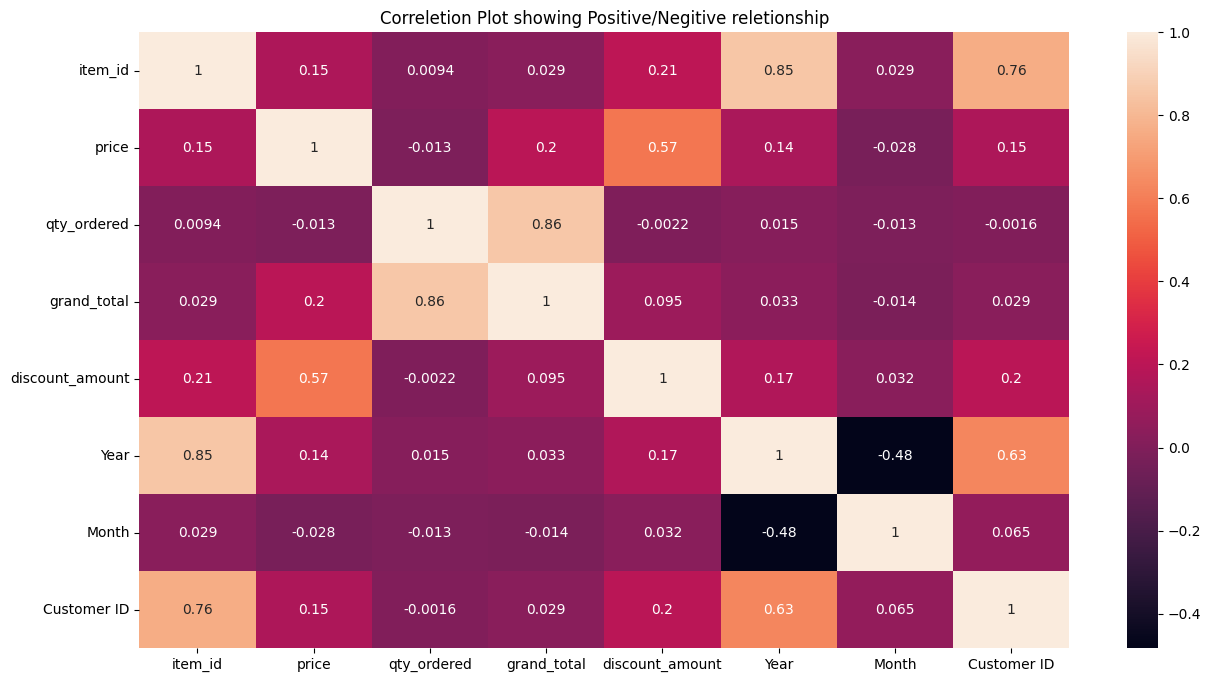

In [207]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True)
plt.title('Correletion Plot showing Positive/Negitive reletionship')

Text(0.5, 1.0, 'Showing ETS (Erorr, Trend and Residual in data according to Time)')

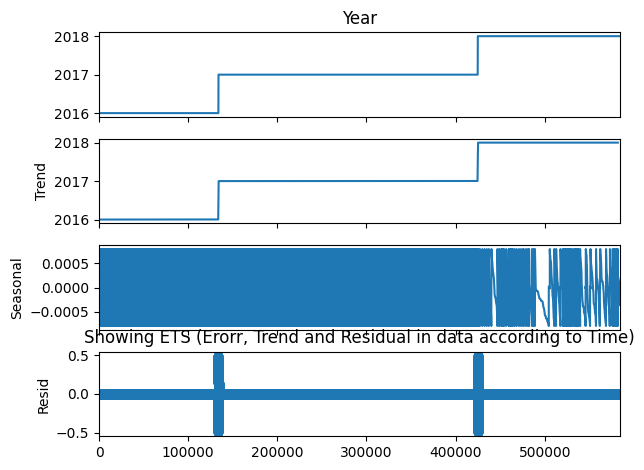

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Year'],model='additive',period=365)
decompose.plot()
plt.title('Showing ETS (Erorr, Trend and Residual in data according to Time)')